In [4]:
from osgeo import gdal, ogr, osr
import rasterio as rio
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
#import 

In [57]:
red_aot_mean = []
red_aot_max = []
blue_aot_max = []
blue_aot_mean = []
def VisualAod(folder_path:str, filename:str, x:int, fig, ax):
    with rio.open(folder_path + filename) \
        as src:
        red = src.read(1)
        red[red == 0] = np.nan
        blue = src.read(2)
        blue[blue == 0] = np.nan
        #if 1:#(int(filename[10:14]) == 2012):
        red[red >= np.nanmax(red) - .01] = np.nan
        blue[blue >= np.nanmax(blue) - .01] = np.nan
        red_aot_mean.append(np.nanmean(red))
        red_aot_max.append(np.nanmax(red))
        blue_aot_max.append(np.nanmax(blue))
        blue_aot_mean.append(np.nanmean(blue))
        print(np.nanmax(red), np.nanmax(blue))
        #fig1, ax1 = plt.subplots(x,1,figsize=(10,3))
        #print(type(ax[x]))
        img = ax[x][0].imshow(red, cmap="tab10")
        img2 = ax[x][1].imshow(blue, cmap="tab10")
        ax[x][0].set_title("Year "+filename[10:14]+" aot550 0.66$\mu$m")
        ax[x][1].set_title("Year "+filename[10:14]+" aot550 0.47$\mu$m")
        # ax[x][0].set_xlable("")
        plt.colorbar(img, ax=ax[x][0])
        plt.colorbar(img2, ax=ax[x][1])
    #ax.set_xlabel("")
    pass

In [36]:
len(red_aot_max)

8

0.5720427 0.6309889
2.702205 2.702205
1.6571355 1.8472286
0.46662354 0.67417115
0.62692034 0.6311006
2.0139356 2.3368564
1.4644104 1.4981769
0.6316235 0.6316235


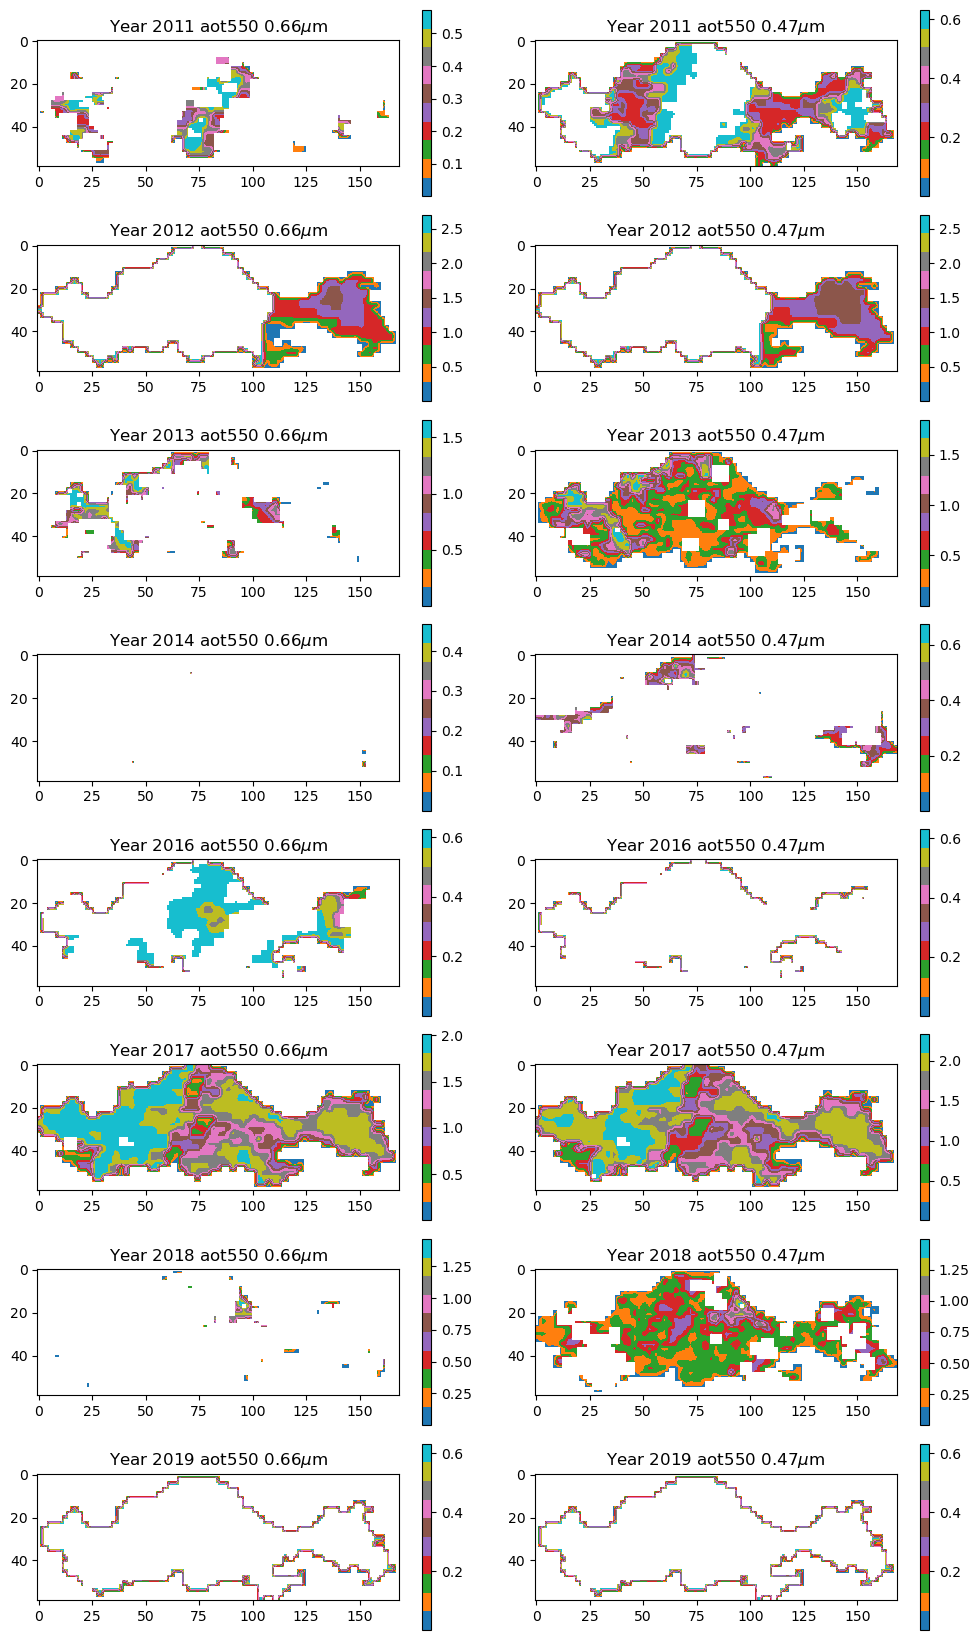

In [58]:
import os
folder_path = "./aot-corr/"
size = len(os.listdir(folder_path)) # 图像总数
i = 0
fig, ax = plt.subplots(size, 2, figsize=(10,18))
for fname in os.listdir(folder_path):
    VisualAod(folder_path, fname, i, fig, ax)
    i+=1
plt.subplots_adjust(left=0.05, bottom=0.05,
                     right=1, top=0.95, hspace=0.1,wspace=0.1)
plt.savefig("res2.pdf", dpi=300)
#plt.plot()

In [41]:
stat = np.array([red_aot_max, red_aot_mean, blue_aot_max, blue_aot_mean])
np.save("stat2.npy", stat)